In [2]:
import sys
import os

# Add project root to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Now imports will work
from src.storage.mongo import MongoHandler
import pandas as pd


In [4]:
mongo = MongoHandler()

df = pd.DataFrame(list(mongo.collection.find()))

print("Total rows:", df.shape[0])
df.head(3)


Total rows: 0


""


In [5]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp")

df[["city", "timestamp"]].head()


KeyError: 'timestamp'

In [4]:
import pandas as pd
from datetime import datetime
from pymongo import MongoClient
import os
from dotenv import load_dotenv

# ----------------------------------
# Load environment variables
# ----------------------------------
load_dotenv()

MONGO_URI = os.getenv("MONGO_URI")
DB_NAME = "aqi_feature_store"
COLLECTION_NAME = "raw_aqi_weather_daily"

# ----------------------------------
# MongoDB connection
# ----------------------------------
client = MongoClient(MONGO_URI)
db = client[DB_NAME]
collection = db[COLLECTION_NAME]



In [5]:
# Load data from MongoDB
data = list(collection.find())

df = pd.DataFrame(data)

print("Raw rows:", df.shape[0])

if df.empty:
    raise ValueError("No data found in MongoDB collection")


Raw rows: 1118


In [6]:
# Keep only modeling-relevant columns
# ----------------------------------
KEEP_COLUMNS = [
    "city",
    "date",
    "aqi_avg",
    "temperature_avg",
    "temperature_min",
    "temperature_max",
    "humidity_avg",
    "wind_speed_avg",
    "precipitation_sum",
    "source_aqi",
    "source_weather",
    "created_at"
]

# Keep only columns that actually exist
df = df[[col for col in KEEP_COLUMNS if col in df.columns]]

# ----------------------------------
# Basic cleaning
# ----------------------------------
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date").reset_index(drop=True)

df.head()

,city,date,aqi_avg,temperature_avg,temperature_min,temperature_max,humidity_avg,wind_speed_avg,precipitation_sum,source_aqi,source_weather,created_at
0,Karachi,2023-01-01,152.0,19.7,14.6,25.0,63,16.4,0.0,IQAir,Open-Meteo,2026-01-24 13:15:24.371
1,Karachi,2023-01-02,152.0,19.8,14.5,25.5,47,16.1,0.0,IQAir,Open-Meteo,2026-01-24 13:15:28.615
2,Karachi,2023-01-03,152.0,19.6,14.7,25.4,35,22.4,0.0,IQAir,Open-Meteo,2026-01-24 13:15:31.963
3,Karachi,2023-01-04,152.0,18.5,14.1,24.0,33,26.3,0.0,IQAir,Open-Meteo,2026-01-24 13:15:34.691
4,Karachi,2023-01-05,152.0,17.6,12.8,22.8,29,29.3,0.0,IQAir,Open-Meteo,2026-01-24 13:15:37.315


AQI summary statistics:
count    955.000000
mean     115.354974
std       31.967467
min       76.000000
25%       90.000000
50%      115.000000
75%      129.000000
max      196.000000
Name: aqi_avg, dtype: float64

Missing AQI values: 163


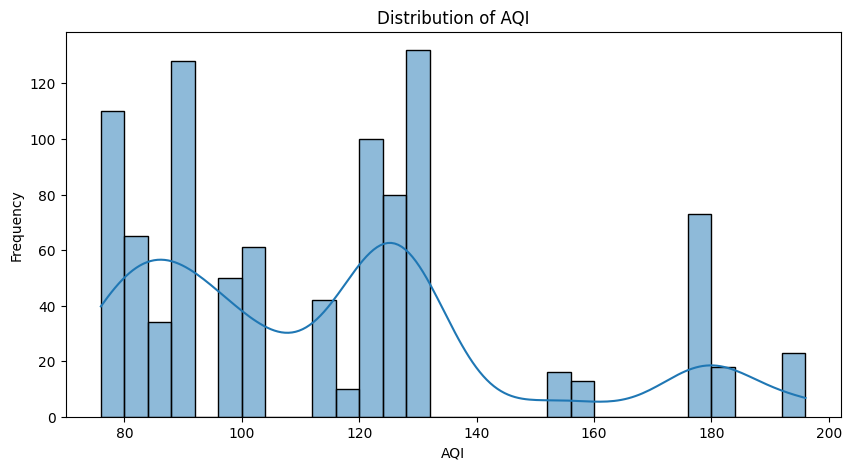

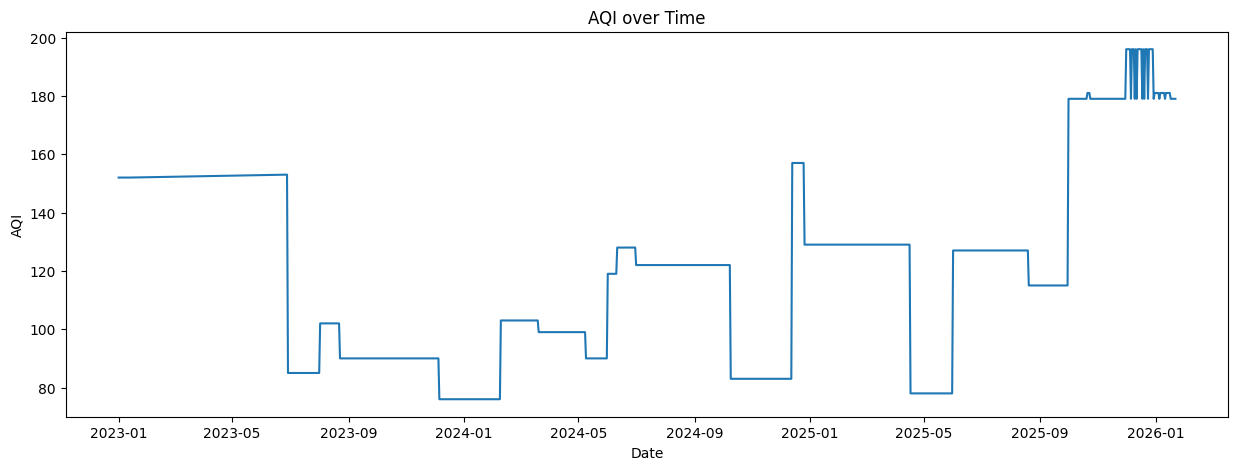

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Basic stats for AQI
# -------------------------------
print("AQI summary statistics:")
print(df['aqi_avg'].describe())
print("\nMissing AQI values:", df['aqi_avg'].isnull().sum())

# -------------------------------
# Distribution plot
# -------------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df['aqi_avg'], bins=30, kde=True)
plt.title("Distribution of AQI")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()

# -------------------------------
# Time series plot
# -------------------------------
plt.figure(figsize=(15, 5))
sns.lineplot(x='date', y='aqi_avg', data=df)
plt.title("AQI over Time")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()
